<center>
  <a href="14.1%20Retrieving%20HTML%20Tables.ipynb">Previous Page</a> | <a href="./">Content Page</a> | <a href="15.1 Retrieving HTML Tables-Cleaning.ipynb">Look at Cleaning Data</a></center>
  

# 14.1.A. Retrieving HTML -Badminton


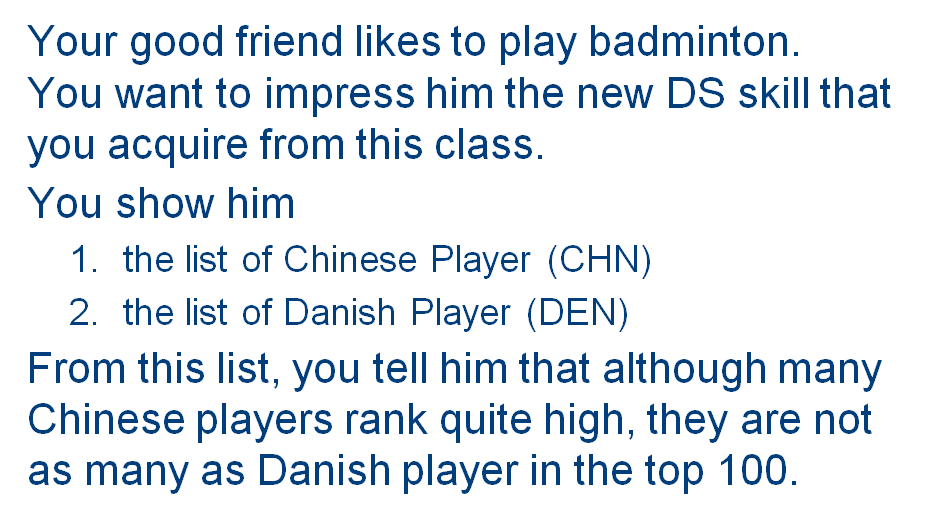

In [1]:
URL='https://bwfbadminton.com/rankings/2/bwf-world-rankings/6/men-s-singles/2018/10/?rows=100&page_no=1'

Import and alias Pandas:

In [2]:
import pandas as pd

Access the table from the link, download, and extract the dataset out of the website. If you're having issues with this, look carefully at the sample code provided in the class:

In [3]:
import requests

In [4]:
df = pd.read_html(requests.get(URL, headers={'User-agent': 'Mozilla/5.0'}).text)

In [5]:
df[0]

,RANK,COUNTRY,PLAYER,CHANGE +/-,WIN - LOSE,PRIZE MONEY,POINTS / TOURNAMENTS,BREAKDOWN
0,1.0,DEN,Viktor AXELSEN,0.0,274 - 107,"$474,552.00","79,580 / 13",NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,MAS,LEE Chong Wei,0.0,689 - 132,"$1,778,882.50","76,924 / 14",NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,IND,KIDAMBI Srikanth,0.0,178 - 88,"$393,977.50","75,695 / 12",NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,KOR,SON Wan Ho,1.0,297 - 161,"$386,945.00","73,970 / 19",NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5.0,CHN,CHEN Long,1.0,365 - 83,"$1,074,827.50","73,636 / 13",NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df[0].columns

Index(['RANK', 'COUNTRY', 'PLAYER', 'CHANGE +/-', 'WIN - LOSE', 'PRIZE MONEY',
       'POINTS                / TOURNAMENTS', 'BREAKDOWN'],
      dtype='object')

###### We don't want to drop all NaN... just drop rows that have NaN greater than 

In [7]:
bad=df[0].dropna(axis=0, thresh=1)

In [8]:
bad.head(4)

,RANK,COUNTRY,PLAYER,CHANGE +/-,WIN - LOSE,PRIZE MONEY,POINTS / TOURNAMENTS,BREAKDOWN
0,1.0,DEN,Viktor AXELSEN,0.0,274 - 107,"$474,552.00","79,580 / 13",NaN
2,2.0,MAS,LEE Chong Wei,0.0,689 - 132,"$1,778,882.50","76,924 / 14",NaN
4,3.0,IND,KIDAMBI Srikanth,0.0,178 - 88,"$393,977.50","75,695 / 12",NaN
6,4.0,KOR,SON Wan Ho,1.0,297 - 161,"$386,945.00","73,970 / 19",NaN


In [9]:
bad.columns

Index(['RANK', 'COUNTRY', 'PLAYER', 'CHANGE +/-', 'WIN - LOSE', 'PRIZE MONEY',
       'POINTS                / TOURNAMENTS', 'BREAKDOWN'],
      dtype='object')

In [10]:
bad[bad.COUNTRY=='_____'] ### FIND DENMARK DEN

,RANK,COUNTRY,PLAYER,CHANGE +/-,WIN - LOSE,PRIZE MONEY,POINTS / TOURNAMENTS,BREAKDOWN


In [11]:
bad[bad.COUNTRY=='___']#FIND CHINA

,RANK,COUNTRY,PLAYER,CHANGE +/-,WIN - LOSE,PRIZE MONEY,POINTS / TOURNAMENTS,BREAKDOWN
